In [1]:
# 면적 그래프 
import pandas as pd
import matplotlib.pyplot as plt
# 한글 처리
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)
# 데이터 불러오기
df = pd.read_excel('./data-4/시도별_전출입_인구수.xlsx')
df.head()
# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합부분)
df = df.ffill()
df.head()
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
# 전출지별 열을 삭제하기
df_seoul = df_seoul.drop(['전출지별'], axis=1)
# '전입지별'을 '전입지' 열이름 변경하기
df_seoul = df_seoul.rename({'전입지별': '전입지'}, axis=1)
df_seoul
# 전입지 열을 행 인덱스로 만들기
df_seoul = df_seoul.set_index('전입지')
df_seoul.head()
col_years = list( map(str, range(1970,2018) ) ) # ['1970', '1971']
df_4 = df_seoul.loc[ ['충청남도', '경상북도', '강원도', '전라남도'], col_years ]
df_4

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


In [2]:
df_4 = df_4.T
df_4

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314
1975,51205,46177,27837,46610
1976,41447,40376,25927,46251
1977,43993,41155,25415,43430
1978,48091,42940,26700,44624
1979,45388,43565,27599,47934


<class 'matplotlib.axes._axes.Axes'> ~~
<class 'pandas.core.frame.DataFrame'>


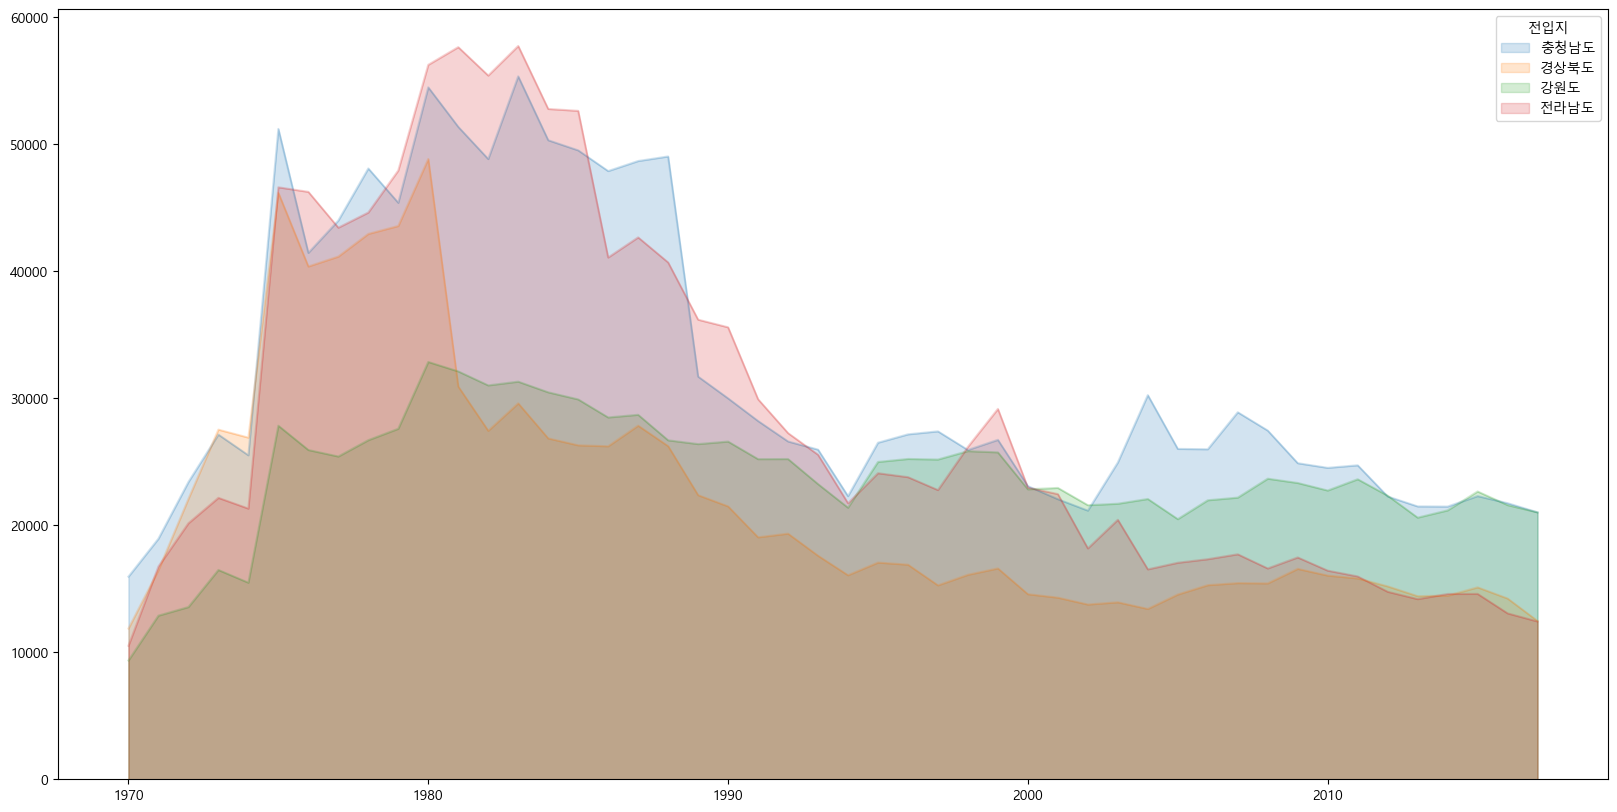

In [3]:
# df_4.plot()
# df_4[['강원도', '전라남도']].plot()
ax = df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))
print(type(ax), '~~')
print(type(df_4))

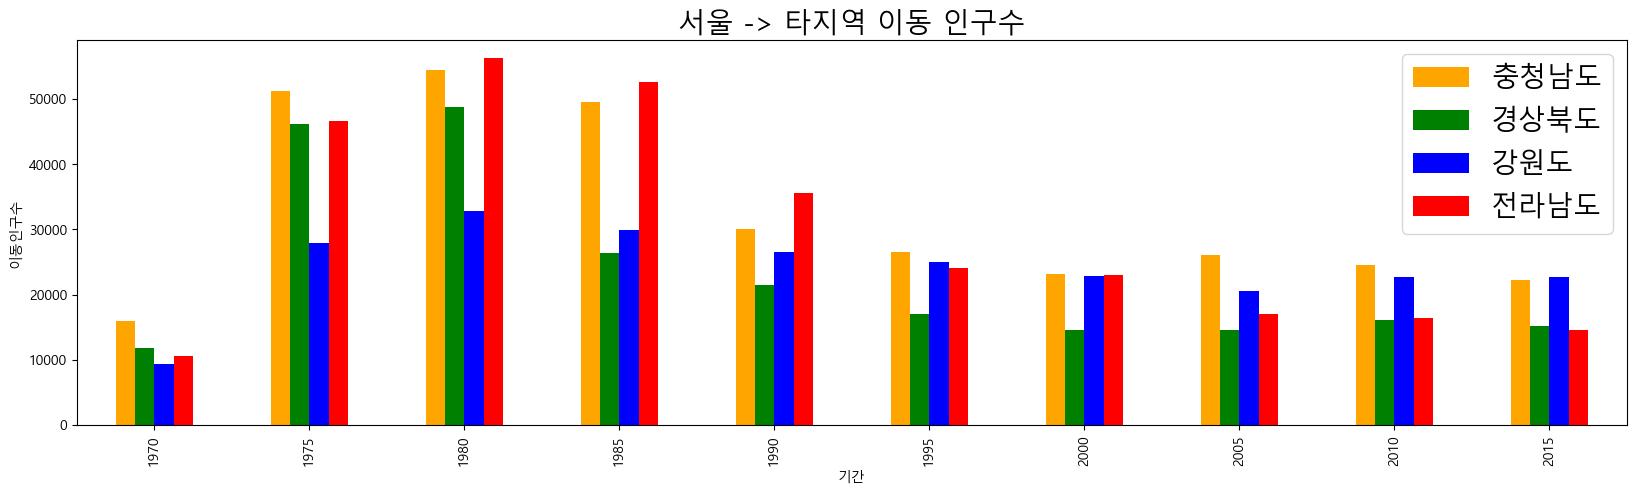

In [15]:
df_4.index = df_4.index.astype(int)
df_4.index
df_4.plot(kind='bar', figsize=(20, 5), width=0.5, color=['orange', 'green', 'blue', 'red'])
plt.title('서울 -> 타지역 이동 인구수', size=20)
plt.ylabel('이동인구수', size=10)
plt.xlabel('기간', size=10)
plt.legend(loc='best', fontsize=20)
plt.show()

In [11]:
df_4 = df_4.loc[[1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015], :]

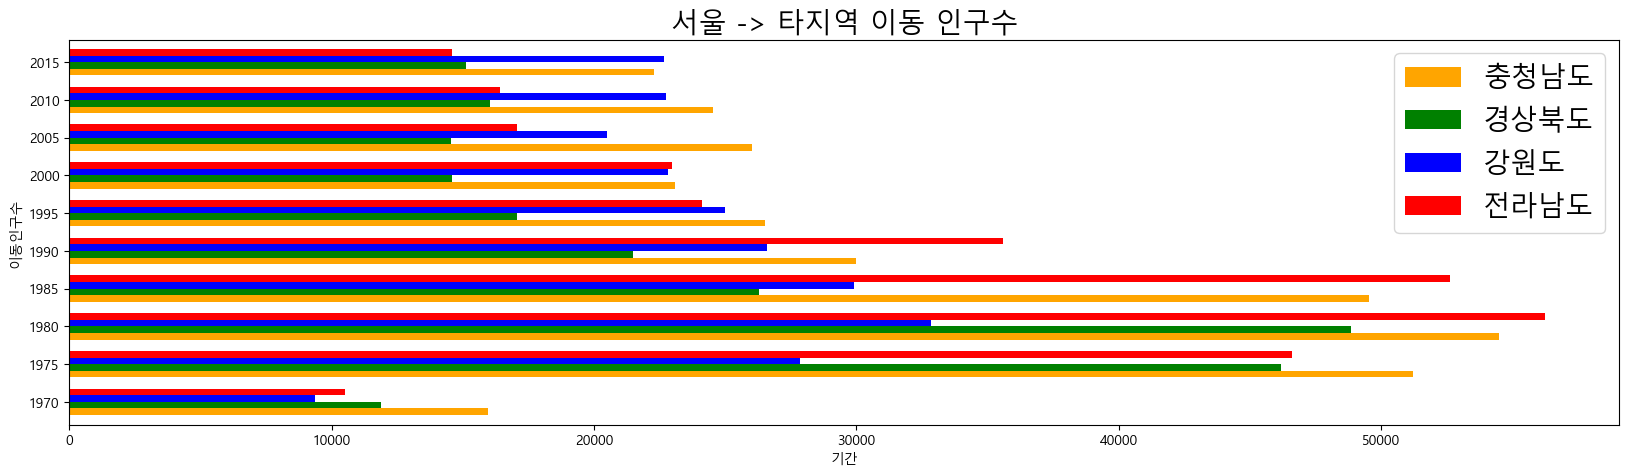

In [14]:
df_4.index = df_4.index.astype(int)
df_4.index
df_4.plot(kind='barh', figsize=(20, 5), width=0.7, color=['orange', 'green', 'blue', 'red'])
plt.title('서울 -> 타지역 이동 인구수', size=20)
plt.ylabel('이동인구수', size=10)
plt.xlabel('기간', size=10)
plt.legend(loc='best', fontsize=20)
plt.show()

In [17]:
# 인구수 합계 구하기
df_4['합계'] = df_4.sum(axis=1)
df_4

전입지,충청남도,경상북도,강원도,전라남도,합계
1970,15954,11868,9352,10513,47687
1975,51205,46177,27837,46610,171829
1980,54480,48839,32858,56251,192428
1985,49520,26297,29911,52629,158357
1990,29993,21490,26591,35589,113663
1995,26501,17064,24987,24100,92652
2000,23083,14576,22832,22969,83460
2005,26012,14550,20483,17049,78094
2010,24522,16042,22736,16429,79729
2015,22299,15113,22659,14598,74669


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_excel('./data-4/남북한발전전력량.xlsx')
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis=1, inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T
for col in df.columns:
    df[col] = df[col].replace('-', '0')
df = df.astype(float)
df.info()
df = df.rename(columns={'합계': '총발전량'})
df['총발전량-1년'] = df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량'] / df['총발전량-1년'])-1)*100
df

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1990 to 2016
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   합계      27 non-null     float64
 1   수력      27 non-null     float64
 2   화력      27 non-null     float64
 3   원자력     27 non-null     float64
dtypes: float64(4)
memory usage: 1.1+ KB


발전 전력별,총발전량,수력,화력,원자력,총발전량-1년,증감률
1990,277.0,156.0,121.0,0.0,NaN,NaN
1991,263.0,150.0,113.0,0.0,277.0,-5.054152
1992,247.0,142.0,105.0,0.0,263.0,-6.083650
1993,221.0,133.0,88.0,0.0,247.0,-10.526316
1994,231.0,138.0,93.0,0.0,221.0,4.524887
1995,230.0,142.0,88.0,0.0,231.0,-0.432900
1996,213.0,125.0,88.0,0.0,230.0,-7.391304
1997,193.0,107.0,86.0,0.0,213.0,-9.389671
1998,170.0,102.0,68.0,0.0,193.0,-11.917098
1999,186.0,103.0,83.0,0.0,170.0,9.411765


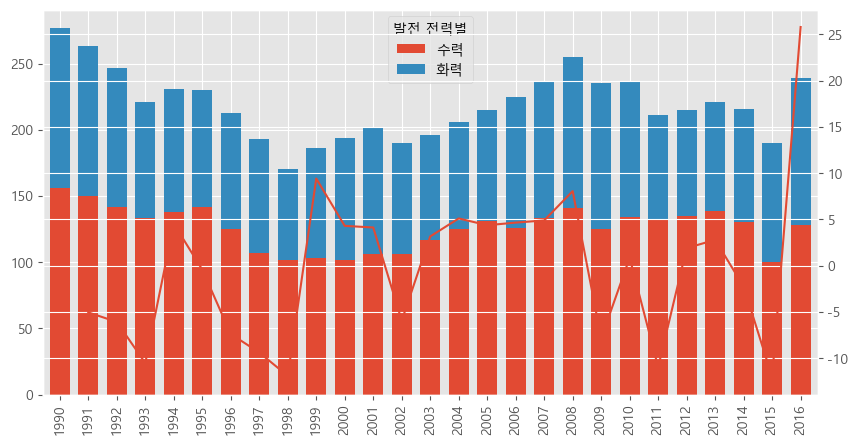

In [43]:
ax1 = df[['수력', '화력']].plot(kind='bar', figsize=(10, 5), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df['증감률'])
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1990 to 2016
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   합계      27 non-null     float64
 1   수력      27 non-null     float64
 2   화력      27 non-null     float64
 3   원자력     27 non-null     float64
 4   신재생     27 non-null     float64
dtypes: float64(5)
memory usage: 1.3+ KB


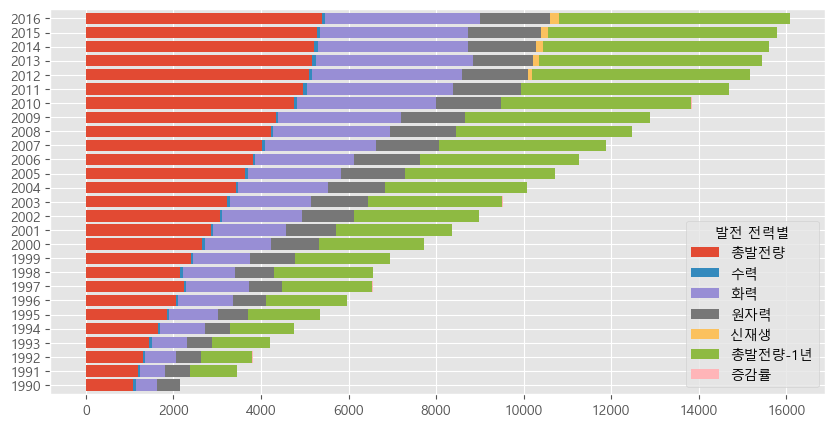

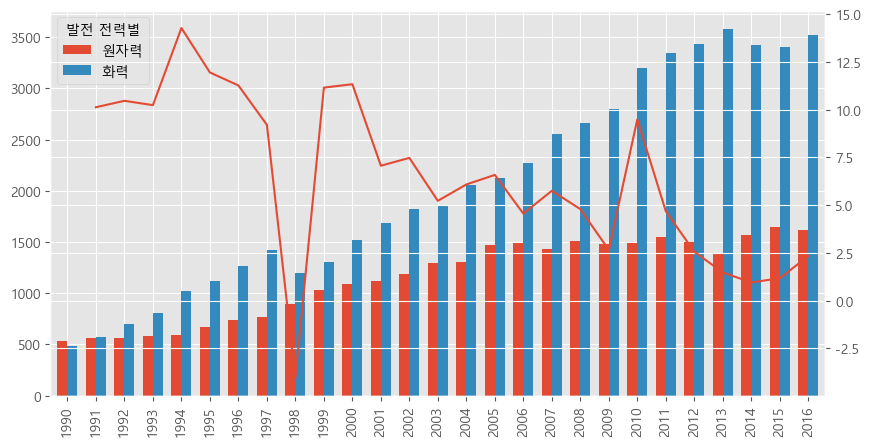

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_excel('./data-4/남북한발전전력량.xlsx')
df = df.loc[0:4]
df.drop('전력량 (억㎾h)', axis=1, inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T
for col in df.columns:
    df[col] = df[col].replace('-', '0')
df = df.astype(float)
df.info()
df = df.rename(columns={'합계': '총발전량'})
df['총발전량-1년'] = df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량'] / df['총발전량-1년'])-1)*100
ax1 = df.plot(kind='barh', figsize=(10, 5), width=0.8, stacked=True)
ax2 = df[['원자력', '화력']].plot(kind='bar', figsize=(10, 5), width=0.7, stacked=False)
ax3 = ax2.twinx()
ax3.plot(df.index, df['증감률'])

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1990 to 2016
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   합계      27 non-null     float64
 1   수력      27 non-null     float64
 2   화력      27 non-null     float64
 3   원자력     27 non-null     float64
 4   신재생     27 non-null     float64
 5   합계      27 non-null     float64
 6   수력      27 non-null     float64
 7   화력      27 non-null     float64
 8   원자력     27 non-null     float64
dtypes: float64(9)
memory usage: 2.1+ KB


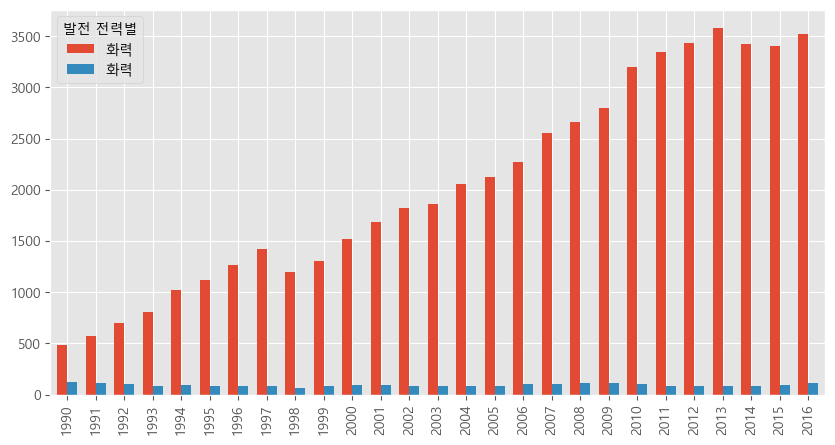

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_excel('./data-4/남북한발전전력량.xlsx')
df = df.loc[0:9]
df.drop('전력량 (억㎾h)', axis=1, inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T
for col in df.columns:
    df[col] = df[col].replace('-', '0')
df = df.astype(float)
df.info()
df = df.rename(columns={'합계': '총발전량'})
ax2 = df['화력'].plot(kind='bar', figsize=(10, 5), width=0.7, stacked=False)